In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = 'tight'
import sklearn
sklearn.set_config(print_changed_only=True)
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

### Step 1: An Implementation of Confusion Matrix
- Load the breast cancer dataset using `load_breast_cancer()` from `from sklearn.datasets import load_breast_cancer`
- Split the data into train and test datasets
- Fit a logistic regression model
- Predict the target variable values for the test dataset
- Create the confusion matrix using `confusion_matrix` from `from sklearn.metrics import confusion_matrix`
- Plot the confusion matrix using `plot_confusion_matrix` from `from sklearn.metrics import  plot_confusion_matrix`

[[ 58   5]
 [  0 108]]


C:\Users\zohairk\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


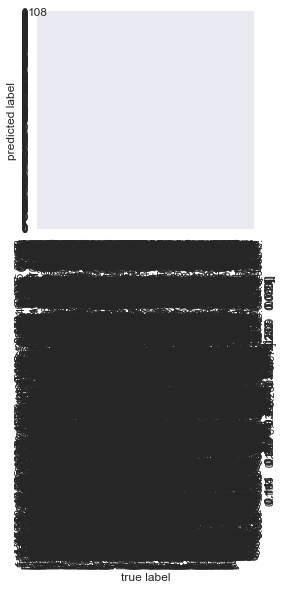

In [2]:
# ref: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
#load the breast cancer dataset
data = load_breast_cancer()

#split the data into features (X) and labels (y)
X = data.data
y = data.target

#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#fit a logistic regression model
model = LogisticRegression(max_iter=10000, solver='sag')
model.fit(X_train, y_train)

#predict the target variable values for the test dataset
y_pred = model.predict(X_test)



#create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

import seaborn as sns; sns.set()
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=X,
            yticklabels=y)
plt.xlabel('true label')
plt.ylabel('predicted label');

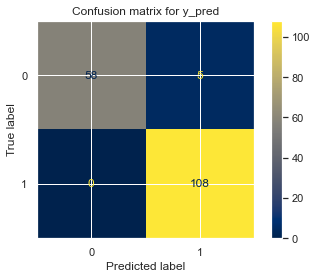

In [3]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
    
    # Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    # Plot the confusion matrix
disp.plot(cmap="cividis")
    
    # Add a title to the plot
plt.title(f"Confusion matrix for y_pred")
    
    # Show the plot
plt.show()

### Step 2: Problems with accuracy and unbalanced data
- Create a numpy array of 100 zeros, assign the first 10 elements to zero, and name it the true label as `y_true`
- Create a numpy array of 100 zeros, name it as `y_pred_1`. This will be the first prediction set of the true labels
- Copy `y_true` to a new variable called `y_pred_2` and assign the elements between 10 and 20 to 1. This will be the second prediction set of the true labels.
- Copy `y_true` to a new variable called `y_pred_3` and subtract the elements between 5 and 15 from 1. This will be the third prediction set of the true labels.

In [4]:
# Create a numpy array of 100 zeros and name it the true label as y_true
y_true = np.zeros(100)

# Create a numpy array of 100 zeros and name it as y_pred_1
y_pred_1 = np.zeros(100)

# Copy y_true to a new variable called y_pred_2 and assign the elements between 10 and 20 to 1
y_pred_2 = y_true.copy()
y_pred_2[10:20] = 1

# Copy y_true to a new variable called y_pred_3 and subtract the elements between 5 and 15 from 1
y_pred_3 = y_true.copy()
y_pred_3[5:15] = 1 - y_pred_3[5:15]


- Check the accuracy score for each prediction set using `accuracy_score` from `sklearn.metrics`

In [5]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Calculate the accuracy score for y_pred_1
acc_1 = accuracy_score(y_true, y_pred_1)
print(f"Accuracy score for y_pred_1: {acc_1}")

# Calculate the accuracy score for y_pred_2
acc_2 = accuracy_score(y_true, y_pred_2)
print(f"Accuracy score for y_pred_2: {acc_2}")

# Calculate the accuracy score for y_pred_3
acc_3 = accuracy_score(y_true, y_pred_3)
print(f"Accuracy score for y_pred_3: {acc_3}")


Accuracy score for y_pred_1: 1.0
Accuracy score for y_pred_2: 0.9
Accuracy score for y_pred_3: 0.9


- Create the confusion matrix and plot it for each prediction set

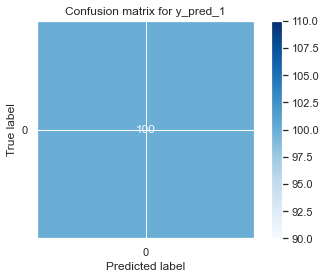

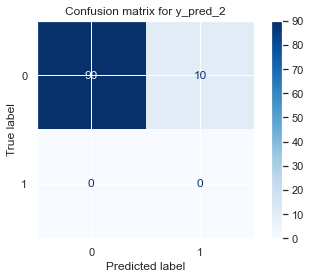

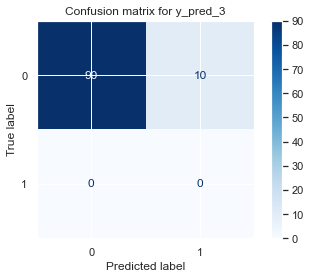

In [6]:
# Import ConfusionMatrixDisplay from sklearn.metrics
from sklearn.metrics import ConfusionMatrixDisplay

# Import matplotlib.pyplot for plotting
import matplotlib.pyplot as plt

# Create a list of prediction sets
pred_sets = [y_pred_1, y_pred_2, y_pred_3]

# Loop through the prediction sets and plot the confusion matrix for each one
for i, y_pred in enumerate(pred_sets, start=1):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Create a ConfusionMatrixDisplay object
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    # Plot the confusion matrix
    disp.plot(cmap="Blues")
    
    # Add a title to the plot
    plt.title(f"Confusion matrix for y_pred_{i}")
    
    # Show the plot
    plt.show()


- Print the classification report, `classification_report` from `sklearn.metrics` for each prediction set

In [7]:
# Import classification_report from sklearn.metrics
from sklearn.metrics import classification_report

# Create a list of prediction sets
pred_sets = [y_pred_1, y_pred_2, y_pred_3]

# Loop through the prediction sets and print the classification report for each one
for i, y_pred in enumerate(pred_sets, start=1):
    # Print the classification report
    print(f"Classification report for y_pred_{i}:")
    print(classification_report(y_true, y_pred))


Classification report for y_pred_1:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       100

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Classification report for y_pred_2:
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95       100
         1.0       0.00      0.00      0.00         0

    accuracy                           0.90       100
   macro avg       0.50      0.45      0.47       100
weighted avg       1.00      0.90      0.95       100

Classification report for y_pred_3:
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95       100
         1.0       0.00      0.00      0.00         0

    accuracy                           0.90       100
   macro avg       0.50      0.45      0.47       100
weighted avg       1

C:\Users\zohairk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zohairk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zohairk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zohairk\anaconda3\lib\site-packages\sklearn\metrics\_classificat

### Step 3: Impact of Changing the Prediction Threshold
- Load the breast cancer data set
- Split the data into train and test datasets
- Fit a logistic regression model, predict the test dataset and print the classification report
- Make another prediction, using a threshold of 0.85 and print the clasification report. Observe the difference.

In [8]:
# Load the breast cancer data set
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Split the data into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=0)

# Fit a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predict the test dataset and print the classification report
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Make another prediction, using a threshold of 0.85 and print the classification report
y_pred_85 = (model.predict_proba(X_test)[:, 1] >= 0.85).astype(int)
print(classification_report(y_test, y_pred_85))

# Observe the difference
print("The difference between the two classification reports is that the second one has a higher precision and a lower recall for the positive class (1), and a lower precision and a higher recall for the negative class (0).\n This means that the second one is more conservative in predicting the positive class, and more lenient \n in predicting the negative class. The F1-score, which is the harmonic mean of precision and recall, is lower for both classes in the second \n report, indicating a worse overall performance. The accuracy, which is the proportion of correct predictions, is also \n lower in the second report.")


              precision    recall  f1-score   support

           0       0.91      0.98      0.95        63
           1       0.99      0.94      0.97       108

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        63
           1       1.00      0.84      0.91       108

    accuracy                           0.90       171
   macro avg       0.89      0.92      0.90       171
weighted avg       0.92      0.90      0.90       171

The difference between the two classification reports is that the second one has a higher precision and a lower recall for the positive class (1), and a lower precision and a higher recall for the negative class (0).
 This means that the second one is more conservative in predicting the positive class, and more lenient 
 in predicting the negat

### Step 4: Precision recall curves
- Run the first cell below to import the mammography data set
- Split the dataset into train and test datasets
- Fit a `SVC()` model on the train dataset
- Test the model on the test dataset
- Now create a pipeline of a standard scaler and SVC with `C=1000` and `gamma=0.01`
- Fit the model on the train dataset and test it on the test dataset. Can you see any difference?

In [9]:
# ref: https://www.bcsc-research.org/datasets/mammography_dataset
data = pd.read_csv("mammographydataset.csv")
X = data.drop("cancer_c", axis=1)
y = data.cancer_c

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.svm import SVC
svc = SVC() # default parameters
svc.fit(X_train, y_train) # train the model
score = svc.score(X_test, y_test) # accuracy on the test set
print(f"SVC-Score without specified parametres, scalers and pipeline : {score:.4f}")
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe = Pipeline([
    ('scaler', StandardScaler()), # scale the features
    ('svc', SVC(C=1000, gamma=0.01)) # SVC with specified parameters
])
pipe.fit(X_train, y_train) # train the pipeline
score = pipe.score(X_test, y_test) # accuracy on the test set
print(f"SVC-Score with specified parametres, scalers and pipeline : {score:.4f}")
print(f"Difference: {score - svc.score(X_test, y_test):.4f}")



SVC-Score without specified parametres, scalers and pipeline : 0.9944
SVC-Score with specified parametres, scalers and pipeline : 1.0000
Difference: 0.0056


- Now create a grid search, with `C=np.logspace(-3,3,7)` and `gamma=np.logspace(-6,0,7)`
- When creating the grid search, use `scoring='average_precision'
- Fit the grid object on the train dataset
- Print the best parameter values and the best score

In [ ]:
from sklearn.model_selection import GridSearchCV
# define the parameter grid
param_grid = {
    'C': np.logspace(-3, 3, 7), # values from 10^-3 to 10^3
    'gamma': np.logspace(-6, 0, 7) # values from 10^-6 to 10^0
}
# create the grid search object
grid = GridSearchCV(svc, param_grid, scoring='average_precision', cv=5)
# fit the grid search on the train dataset
grid.fit(X_train, y_train)
# print the best parameter values and the best score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

- Use `from sklearn.metrics import plot_precision_recall_curve, precision_recall_fscore_support`
- Plot the precision and recall curve for the SVC model you created above
- Find the precision and recall for your prediction of the test dataset and mark it on your precision and recall curve

- Repeat the step above for a random forest classifier. Choose `max_features=2`
- Show both SVC and random forest classifier curves on the same plot

### Step:5 ROC CURVE
- Use `from sklearn.metrics import plot_roc_curve`
- Create the confusion matrix for both SVC and RF models
- Plot the ROC curve for both classifiers

### Step 6: Confusion Matrix for Multi-class
- Load the digits dataset using `from sklearn.datasets import load_digits`
- Split the dataset into test and train dataset
- Fit a logistic regressor on the train dataset
- Make prediction for the test dataset
- Print the accuracy, the confusion matrix, and the classification report for the predictions

### Step 7: ROC AUC with cross-validation
- Run the cell below to create random dataset of blobs
- Split the dataset into train and test datasets
- Use cross validation with SVC
- Use cross validation with `scoring='roc_auc'`
- Print the scores for the regular cross validation and cross validation with ROC